In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

**ROF** algorithm to denose image

In [2]:
def denoise_image(img, tau=0.125, weight=100, max_iter=50):
    """
    An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    """
    H, W = img.shape # size of noisy image
    # initialize
    U = img.copy()
    Px = img # x-component to the dual field
    Py = img # y-component of the dual field
    i = 0
    while i < max_iter:
        Uold = U
        
        # gradient of primal variable
        dUx = np.roll(U,-1,axis=1)-U # x-component of U's gradient
        dUy = np.roll(U,-1,axis=0)-U # y-component of U's gradient
        
        # update the dual varible
        Px_new = Px + (tau/weight)*dUx
        Py_new = Py + (tau/weight)*dUy
        norm = np.maximum(1, np.sqrt(Px_new**2 + Py_new**2))
        Px = Px_new/norm # update of x-component (dual)
        Py = Py_new/norm # update of y-component (dual)
        # update the primal variable
        RxPx = np.roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = np.roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px - RxPx) + (Py - RyPy) # divergence of the dual field.
        
        U = img + weight*DivP # update of the primal variable
        i+=1
    return U, img - U # denoised image and texture residual

Some simple image

In [3]:
img = np.zeros((500,500))
img[100:400,100:400] = 128
img[200:300,200:300] = 255
noised_img = img + 30* np.random.standard_normal((500,500))

denoised_img, diff = denoise_image(noised_img, max_iter=50)

Visualizing result

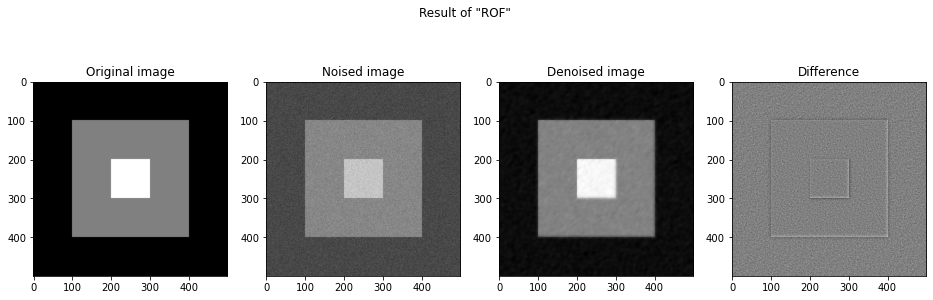

In [4]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle('Result of "ROF"')

ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')

ax2.imshow(noised_img, cmap='gray')
ax2.set_title('Noised image')

ax3.imshow(denoised_img, cmap='gray')
ax3.set_title('Denoised image')

ax4.imshow(diff, cmap='gray')
ax4.set_title('Difference')
plt.show()

Denoising *real* image

In [5]:
img = np.array(Image.open('images/empire.jpg').convert('L'))
img = np.array(img)
noised_img = img + 30* np.random.standard_normal(img.shape)

denoised_img, diff = denoise_image(noised_img, max_iter=20)

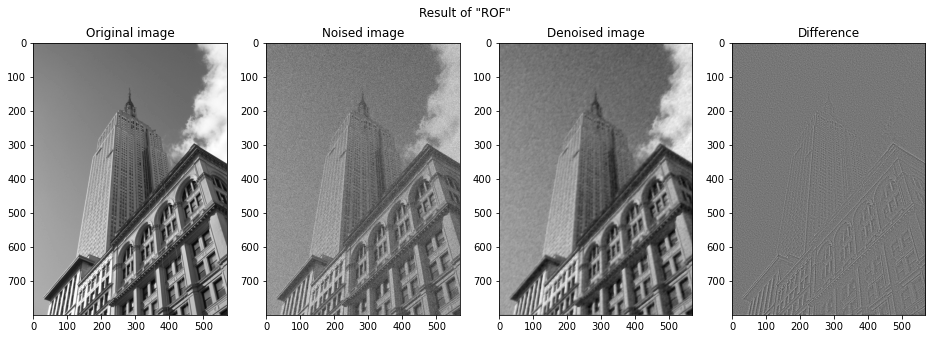

In [6]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle('Result of "ROF"')

ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')

ax2.imshow(noised_img, cmap='gray')
ax2.set_title('Noised image')

ax3.imshow(denoised_img, cmap='gray')
ax3.set_title('Denoised image')

ax4.imshow(diff, cmap='gray')
ax4.set_title('Difference')
plt.show()